# Covid Analysis on US Counties
![USA MAP](https://simplemaps.com/static/demos/resources/svg-library/svgs/us.svg)

The Analysis is done on Covid Cases in USA segregated by Counties

In [1]:
import pandas as pd
pd.set_option('plotting.backend', 'pandas_bokeh')
pd.plotting.output_notebook()
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
sns.set_style("darkgrid")

Loading BokehJS ...

In [2]:
county_df = pd.read_csv("./Data/usa_county_wise.csv")
county_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


## Data Preprocessing

- Checking for data's dimensions

In [3]:
county_df.shape

(627920, 14)

- Checking for null values

In [4]:
county_df.isna().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

- Dropping the columns which are not required, in this case
    - Admin2
    - iso2
    - Combined Key

- Extracting the Month's number from the date Column 

In [5]:
county_df = county_df.drop(["Admin2","iso2","Combined_Key"], axis = 1)
county_df["Date"] = pd.to_datetime(county_df["Date"])
county_df.head()

,UID,iso3,code3,FIPS,Province_State,Country_Region,Lat,Long_,Date,Confirmed,Deaths
0,16,ASM,16,60.0,American Samoa,US,-14.271000,-170.132000,2020-01-22,0,0
1,316,GUM,316,66.0,Guam,US,13.444300,144.793700,2020-01-22,0,0
2,580,MNP,580,69.0,Northern Mariana Islands,US,15.097900,145.673900,2020-01-22,0,0
3,63072001,PRI,630,72001.0,Puerto Rico,US,18.180117,-66.754367,2020-01-22,0,0
4,63072003,PRI,630,72003.0,Puerto Rico,US,18.360255,-67.175131,2020-01-22,0,0


In [6]:
county_df["Month"] = county_df["Date"].dt.strftime("%m")


In [7]:
county_df.Month.value_counts()

03    103540
05    103540
04    100200
06    100200
02     96860
07     90180
01     33400
Name: Month, dtype: int64

In [8]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   UID             627920 non-null  int64         
 1   iso3            627920 non-null  object        
 2   code3           627920 non-null  int64         
 3   FIPS            626040 non-null  float64       
 4   Province_State  627920 non-null  object        
 5   Country_Region  627920 non-null  object        
 6   Lat             627920 non-null  float64       
 7   Long_           627920 non-null  float64       
 8   Date            627920 non-null  datetime64[ns]
 9   Confirmed       627920 non-null  int64         
 10  Deaths          627920 non-null  int64         
 11  Month           627920 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 57.5+ MB


- Checking for the Maximum and Average Numbers for 
    - Deaths
    - Confirmed Cases

In [9]:
print("Average Death in USA Counties: ",county_df.Deaths.mean())
print("Average Confirmed Cases in USA counties: ",county_df.Confirmed.mean())
print("Maximum Death in USA Counties: ",county_df.Deaths.max())
print("Maximum Confirmed in USA Counties: ",county_df.Confirmed.max())

Average Death in USA Counties:  17.53632787616257
Average Confirmed Cases in USA counties:  357.28428462224485
Maximum Death in USA Counties:  23500
Maximum Confirmed in USA Counties:  224051


In [10]:
county_df.Deaths.min()

0

## County with Maximum number of Deaths at a given day

In [11]:
Max_Death_County = county_df[county_df["Deaths"] == county_df.Deaths.max()]

In [12]:
New_york_map = folium.Map(zoom_start=5,width=500,height=500,location=[Max_Death_County["Lat"],Max_Death_County["Long_"]])
folium.map.Marker(
        location=[Max_Death_County['Lat'], Max_Death_County['Long_']], 
        popup="Max Death",
        icon=folium.Icon(color = "black")
    ).add_to(New_york_map)

New_york_map

In [13]:
death_county = county_df.groupby("Province_State",as_index = False)["Deaths"].count().sort_values("Deaths",ascending = False).head(20)

death_county

,Province_State,Deaths
49,Texas,48128
12,Georgia,30268
53,Virginia,25380
21,Kentucky,22936
29,Missouri,22184
20,Kansas,20116
17,Illinois,19552
37,North Carolina,19176
19,Iowa,18988
48,Tennessee,18236


## Top 20 Counties with Maximum number of deaths

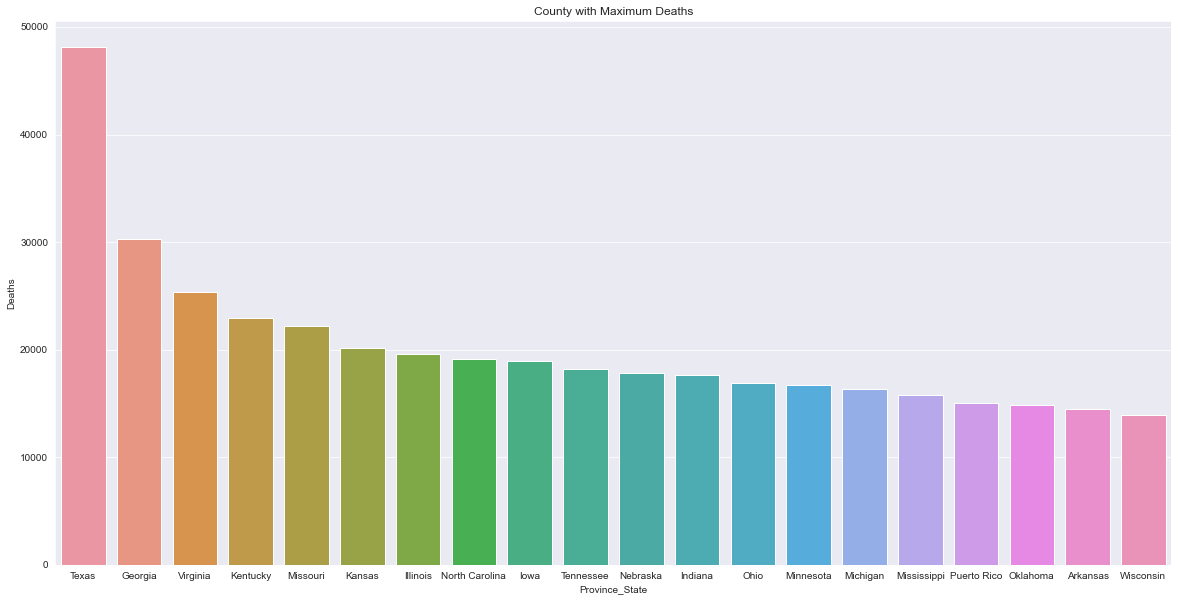

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x = "Province_State",y="Deaths",data = death_county)
ax.set_title("County with Maximum Deaths")
plt.show()

## Top 10 Counties with Minimum Number of Deaths

In [15]:
death_county = county_df.groupby("Province_State",as_index = False)["Deaths"].count().sort_values("Deaths").head(10)


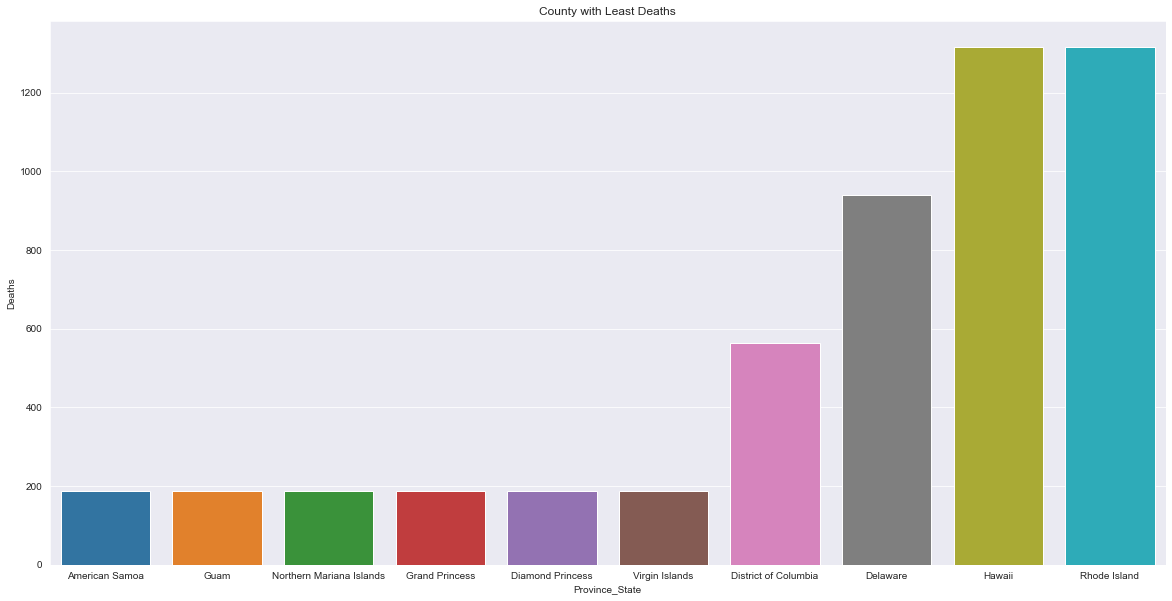

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x = "Province_State",y="Deaths",data = death_county)
ax.set_title("County with Least Deaths")
plt.show()

### Counties with more than 3000 Deaths on an average

In [17]:
geo_df = county_df[county_df["Deaths"]>3000].groupby("Province_State",as_index = False).mean()
geo_df

,Province_State,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
0,California,84006037.0,840.0,6037.0,34.308284,-118.228241,124078.300000,3667.800000
1,Illinois,84017031.0,840.0,17031.0,41.841448,-87.816588,87480.884058,4263.739130
2,New York,84036061.0,840.0,36061.0,40.767273,-73.971526,182595.754237,19859.635593


### Counties with 0 Confirmed Cases on an average

In [18]:
zero_cases = county_df.groupby("Province_State",as_index = False)["Lat","Long_","Confirmed"].mean()
zero_cases = zero_cases[zero_cases["Confirmed"]==0.0]
zero_cases

<ipython-input-18-cd6dc1036767>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zero_cases = county_df.groupby("Province_State",as_index = False)["Lat","Long_","Confirmed"].mean()


,Province_State,Lat,Long_,Confirmed
2,American Samoa,-14.271,-170.132,0.0


### Counties with 0 Deaths on an average

In [19]:
zero_death = county_df.groupby("Province_State",as_index = False)["Lat","Long_","Deaths"].mean()
zero_death = zero_death[zero_death["Deaths"]==0.0]
zero_death

<ipython-input-19-f652aba3e5ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zero_death = county_df.groupby("Province_State",as_index = False)["Lat","Long_","Deaths"].mean()


,Province_State,Lat,Long_,Deaths
2,American Samoa,-14.271,-170.132,0.0
9,Diamond Princess,0.000,0.000,0.0


### Plotting These on Map

In [20]:
geo_df_map = folium.Map(zoom_start=3,width=500,height=500,location=[36.2408038,-113.7584948])
for i, r in geo_df.iterrows():
    folium.map.Marker(
        location=[r['Lat'], r['Long_']], 
        popup="More than 3000 Deaths",
        icon=folium.Icon(color = "red")
    ).add_to(geo_df_map)

folium.map.Marker(
        location=[zero_cases['Lat'], zero_cases['Long_']], 
        popup="0 Cases County",
        icon=folium.Icon(color = "green")
    ).add_to(geo_df_map)
    
for k, l in zero_death.iterrows():
    folium.map.Marker(
        location=[l['Lat'], l['Long_']], 
        popup="0 Deaths County",
        icon=folium.Icon(color = "orange")
    ).add_to(geo_df_map)
    
geo_df_map

## Counties with Montly 0 Deaths and more than 10000 cases

In [21]:
df = county_df[(county_df["Deaths"] == 0) & (county_df["Confirmed"]>10000)].groupby(["Province_State","Month"]).mean()
df.head()

UID  code3     FIPS        Lat      Long_  \
Province_State Month                                                     
Georgia        07     84080013.0  840.0  80013.0   0.000000   0.000000   
Rhode Island   05     84044007.0  840.0  44007.0  41.870647 -71.577535   
               06     84044007.0  840.0  44007.0  41.870647 -71.577535   
               07     84044007.0  840.0  44007.0  41.870647 -71.577535   

                         Confirmed  Deaths  
Province_State Month                        
Georgia        07     12836.166667     0.0  
Rhode Island   05     10710.727273     0.0  
               06     12082.533333     0.0  
               07     13463.629630     0.0

In [22]:
monthly_death = county_df.groupby("Month",as_index = False)["Deaths"].count()
monthly_death

,Month,Deaths
0,01,33400
1,02,96860
2,03,103540
3,04,100200
4,05,103540
5,06,100200
6,07,90180


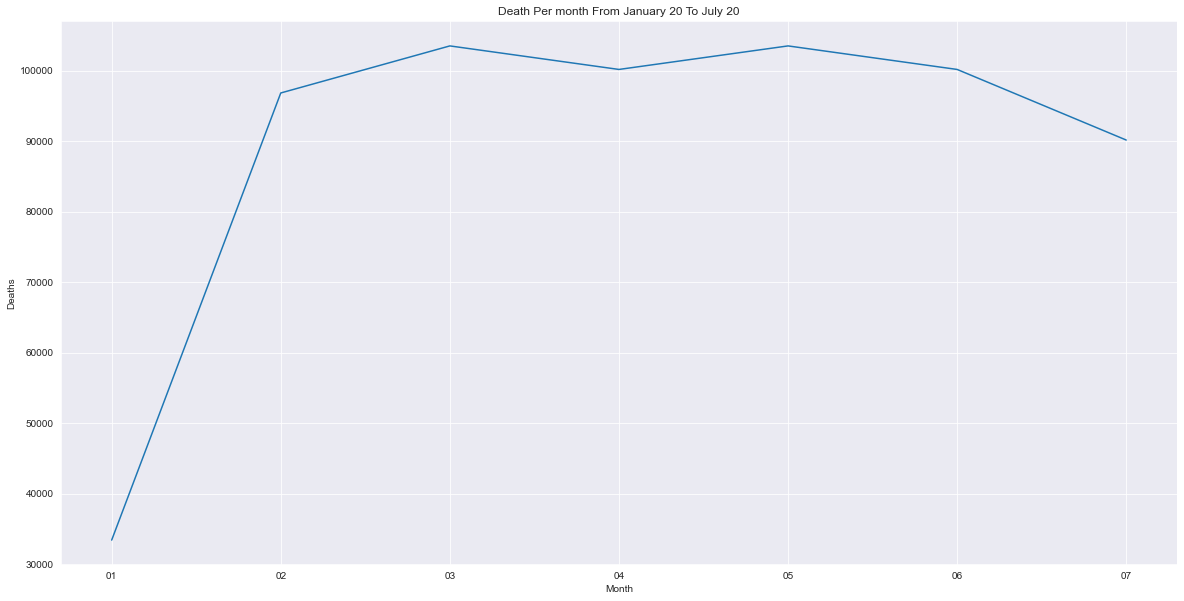

In [23]:
fig,ax = plt.subplots(figsize=(20, 10))
monthly_death_plot = sns.lineplot(x = "Month" , y = "Deaths",data = monthly_death)
monthly_death_plot.set_title("Death Per month From January 20 To July 20")
plt.show()

In [24]:
date_group = county_df.groupby("Date",as_index = False).mean().plot.line(
    figsize=(800, 450),
    x = "Date",
    y = "Confirmed",
    title="Average Confirmed Cases",
    xlabel="Date",
    ylabel="Confirmed Cases",
    plot_data_points=True,
    plot_data_points_size=1,
    )